<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/xgboost_fullstack_trading_pipeline_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-9' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,752 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,092 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,078

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [ ]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [8]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
# === Imports ===
import os
import time
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# === Config ===
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]
CONFIG = {
    'period': '729d',
    'interval': '1h'
}

# === Download Function ===
def download_stock_data(ticker, period="729d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} (period={period}, interval={interval})...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

# === Feature Engineering Function ===
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    df['CCI'] = ((df['Close'] - df['Close'].rolling(20).mean()) /
                 (0.015 * df['Close'].rolling(20).std()))
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    df['RSI'] = 100 - (100 / (1 + df['Close'].diff().where(lambda x: x > 0, 0).rolling(14).mean() /
                               -df['Close'].diff().where(lambda x: x < 0, 0).rolling(14).mean()))
    df['Future_Close'] = df['Close'].shift(-10)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

# === Download & Feature Loop ===
all_dfs = []
for ticker in ticker_list:
    df_raw = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_raw is not None:
        try:
            raw_len = len(df_raw)
            df_feat = compute_enhanced_features(df_raw)
            feat_len = len(df_feat.dropna())  # Drop for comparison only
            min_date = df_feat['Datetime'].min() if not df_feat.empty else "NA"
            max_date = df_feat['Datetime'].max() if not df_feat.empty else "NA"
            print(f"{ticker}: Raw = {raw_len}, After features = {feat_len}, Range = {min_date} to {max_date}")
            all_dfs.append(df_feat)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Skipping {ticker}: download failed")

# === Combine & Save ===
if all_dfs:
    df_all = pd.concat(all_dfs, ignore_index=True)
    print(f"\nFinal combined dataset shape: {df_all.shape}")

    df_all.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally: multi_stock_feature_engineered_dataset.csv")

    # === OPTIONAL: Dynamic walkforward start/end for each ticker ===
    grouped = df_all.groupby("Symbol")
    for symbol, df_ticker in grouped:
        start_date = df_ticker['Datetime'].min().date()
        end_date = df_ticker['Datetime'].max().date()
        print(f"{symbol} walkforward window: {start_date} to {end_date}")


Attempt 1: Downloading AAPL (period=729d, interval=1h)...


/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


AAPL: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading TSLA (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


TSLA: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading MSFT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


MSFT: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading GOOGL (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


GOOGL: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading AMZN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


AMZN: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading NVDA (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


NVDA: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading META (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


META: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading BRK-B (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


BRK-B: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading JPM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


JPM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading JNJ (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


JNJ: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading XOM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


XOM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading V (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


V: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading PG (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


PG: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading UNH (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


UNH: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading MA (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


MA: Raw = 5073, After features = 5044, Range = 2022-08-09 13:30:00 to 2025-07-07 17:30:00
Attempt 1: Downloading HD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


HD: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading LLY (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


LLY: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading MRK (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


MRK: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading PEP (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


PEP: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading KO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


KO: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading BAC (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


BAC: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading ABBV (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


ABBV: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading AVGO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


AVGO: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading PFE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


PFE: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading COST (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


COST: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading CSCO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


CSCO: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading TMO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


TMO: Raw = 5053, After features = 5024, Range = 2022-08-12 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading ABT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


ABT: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading ACN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


ACN: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading WMT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


WMT: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading MCD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


MCD: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading ADBE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


ADBE: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading DHR (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


DHR: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading CRM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


CRM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading NKE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


NKE: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading INTC (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


INTC: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading QCOM (period=729d, interval=1h)...


/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


QCOM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading NEE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


NEE: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading AMD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


AMD: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading TXN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


TXN: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading AMGN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


AMGN: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading UPS (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


UPS: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading LIN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


LIN: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading PM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


PM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading UNP (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


UNP: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading BMY (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


BMY: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading LOW (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


LOW: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading RTX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


RTX: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading CVX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


CVX: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading IBM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


IBM: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading GE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


GE: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading SBUX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-3762022192.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


SBUX: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00
Attempt 1: Downloading ORCL (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


ORCL: Raw = 5074, After features = 5045, Range = 2022-08-09 13:30:00 to 2025-07-07 18:30:00

Final combined dataset shape: (268900, 24)
Saved locally: multi_stock_feature_engineered_dataset.csv
AAPL walkforward window: 2022-08-09 to 2025-07-07
ABBV walkforward window: 2022-08-09 to 2025-07-07
ABT walkforward window: 2022-08-09 to 2025-07-07
ACN walkforward window: 2022-08-09 to 2025-07-07
ADBE walkforward window: 2022-08-09 to 2025-07-07
AMD walkforward window: 2022-08-09 to 2025-07-07
AMGN walkforward window: 2022-08-09 to 2025-07-07
AMZN walkforward window: 2022-08-09 to 2025-07-07
AVGO walkforward window: 2022-08-09 to 2025-07-07
BAC walkforward window: 2022-08-09 to 2025-07-07
BMY walkforward window: 2022-08-09 to 2025-07-07
BRK-B walkforward window: 2022-08-09 to 2025-07-07
COST walkforward window: 2022-08-09 to 2025-07-07
CRM walkforward window: 2022-08-09 to 2025-07-07
CSCO walkforward window: 2022-08-09 to 2025-07-07
CVX walkforward window: 2022-08-09 to 2025-07-07
DHR walkforw

In [14]:
!rm -rf /content/drive

rm: cannot remove '/content/drive/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/.Trash-0': Directory not empty
rm: cannot remove '/content/drive/.Encrypted/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.Encrypted/.shortcut-targets-by-id': Operation canceled


In [ ]:
# === Imports ===
import os, gc, json, joblib, random, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from google.colab import drive
import pywt

# === Mount Google Drive ===
drive.mount("/content/drive", force_remount=True)

# === Config ===
SAVE_DIR = "/content/drive/MyDrive/QuantConnect/results_lightgbm/xgb_walkforward_results"
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
FINAL_MODEL_DIR = f"{RESULTS_DIR}/models"
os.makedirs(f"{RESULTS_DIR}/plots", exist_ok=True)
os.makedirs(f"{RESULTS_DIR}/data", exist_ok=True)
os.makedirs(FINAL_MODEL_DIR, exist_ok=True)

# === Load Denoised Feature Data ===
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)

# === Market Regime Labels ===
df['Volatility'] = df['Close'].pct_change().rolling(20).std()
df['Regime'] = np.where(df['Volatility'] < 0.01, 'Bull',
                        np.where(df['Volatility'] > 0.03, 'Bear', 'Sideways'))
df = pd.concat([df, pd.get_dummies(df['Regime'], prefix="Regime")], axis=1)

# === Feature + Target Columns ===
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch',
            'Regime_Bull', 'Regime_Bear', 'Regime_Sideways']
target = "Target"
label_map = {0: 0, 1: 1, -1: 2}
results = []

# === Ticker List ===
test_mode = False
TICKERS = ['AAPL'] if test_mode else ['GE', 'SBUX', 'ORCL']
simulate_latency = True

# === Rolling Window Generator ===
def generate_date_windows(start_date, end_date, train_days=365, test_days=60, step_days=60):
    windows = []
    current = pd.to_datetime(start_date)
    while current + timedelta(days=train_days + test_days) <= pd.to_datetime(end_date):
        train_start = current
        train_end = train_start + timedelta(days=train_days)
        test_start = train_end
        test_end = test_start + timedelta(days=test_days)
        windows.append((train_start, train_end, test_start, test_end))
        current += timedelta(days=step_days)
    return windows

# === Walkforward XGBoost Function ===
def walkforward_xgb(df_ticker, ticker):
    df_ticker['Target_Mapped'] = df_ticker[target].map(label_map)
    start_date = df_ticker['Datetime'].min().date()
    end_date = df_ticker['Datetime'].max().date()
    windows = generate_date_windows(start_date, end_date, train_days=365, test_days=60, step_days=60)

    last_model = None
    last_valid = False

    for (train_start, train_end, test_start, test_end) in windows:
        print(f"\nTraining: {train_start.date()} to {train_end.date()}, Testing: {test_start.date()} to {test_end.date()}")

        train_df = df_ticker[(df_ticker['Datetime'] >= train_start) & (df_ticker['Datetime'] < train_end)].dropna(subset=features + ['Target'])
        test_df = df_ticker[(df_ticker['Datetime'] >= test_start) & (df_ticker['Datetime'] < test_end)].dropna(subset=features + ['Target'])

        if len(train_df) < 200 or len(test_df) < 50:
            print(f"Skipping due to insufficient data: train = {len(train_df)}, test = {len(test_df)}")
            continue

        print("Target_Mapped\n", train_df['Target_Mapped'].value_counts())
        X_train, y_train = train_df[features], train_df['Target_Mapped']
        X_test, y_test = test_df[features], test_df['Target_Mapped']

        model = XGBClassifier(n_estimators=100, learning_rate=0.05, tree_method='hist', random_state=42)
        model.fit(X_train, y_train)

        proba = model.predict_proba(X_test)
        preds = np.argmax(proba, axis=1)
        conf_scores = proba.max(axis=1)

        signal = preds - 1
        confidence_threshold = 0.6
        signal[(conf_scores < confidence_threshold)] = 0

        test_df = test_df.copy()
        test_df['Signal'] = signal
        test_df['Rolling_Mean_50'] = test_df['Close'].rolling(50).mean()

        print("Signal distribution:", test_df['Signal'].value_counts().to_dict())
        print("Confidence: min = %.3f  max = %.3f  mean = %.3f" % (conf_scores.min(), conf_scores.max(), conf_scores.mean()))
        print("Missed signals due to low confidence:", sum(conf_scores < confidence_threshold))

        capital = 100000
        shares = 0
        portfolio = []
        slippage_pct = 0.001
        last_trade_idx = -10

        for i, row in test_df.iterrows():
            price = row['Close']
            atr = row.get('ATR', 2.0)
            signal = row['Signal']

            if simulate_latency:
                time.sleep(random.uniform(0.1, 0.4))

            if signal == 1 and (i - last_trade_idx > 5) and capital > price and price > row['Rolling_Mean_50']:
                risk_per_trade = 0.02 * capital
                stop_price = price - atr
                risk_per_share = max(price - stop_price, 1e-6)
                qty = min((risk_per_trade // risk_per_share), (capital * 0.1) // price)
                buy_price = price * (1 + slippage_pct)

                if qty > 0:
                    capital -= qty * buy_price
                    shares += qty
                    last_trade_idx = i
                    print(f"[Broker] BUY {qty:.1f} {ticker} @ {buy_price:.2f}")

            elif signal == -1 and shares > 0 and (i - last_trade_idx > 5):
                sell_price = price * (1 - slippage_pct)
                capital += shares * sell_price
                print(f"[Broker] SELL {shares:.1f} {ticker} @ {sell_price:.2f}")
                shares = 0
                last_trade_idx = i

            portfolio.append(capital + shares * price)

        if not portfolio or np.std(portfolio) == 0:
            print("No trades or zero variance portfolio. Attempting fallback...")
            if last_valid:
                proba = last_model.predict_proba(X_test)
                preds = np.argmax(proba, axis=1)
                conf_scores = proba.max(axis=1)
                signal = preds - 1
                signal[(conf_scores < confidence_threshold)] = 0
                test_df['Signal'] = signal
                print("Reused last model. New signals:", test_df['Signal'].value_counts().to_dict())
                continue
            else:
                print("No fallback model available.")
                continue

        final_value = portfolio[-1]
        return_pct = (final_value - 100000) / 100000 * 100
        returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100

        results.append({
            "Ticker": ticker,
            "Train Period": f"{train_start.date()} to {train_end.date()}",
            "Test Period": f"{test_start.date()} to {test_end.date()}",
            "Model": "XGBoost",
            "Accuracy": round(accuracy_score(y_test, preds), 4),
            "Sharpe": round(sharpe, 3),
            "Drawdown": round(drawdown, 2),
            "Return": round(return_pct, 2),
            "Final_Portfolio": round(final_value, 2)
        })

        filename_prefix = f"{ticker}_{train_start.date()}_{test_start.date()}"
        joblib.dump(model, os.path.join(FINAL_MODEL_DIR, f"xgb_{filename_prefix}.pkl"))
        with open(os.path.join(FINAL_MODEL_DIR, f"xgb_{filename_prefix}_features.json"), "w") as f:
            json.dump(features, f)

        test_df.to_csv(os.path.join(RESULTS_DIR, "data", f"{ticker}_{filename_prefix}_result.csv"), index=False)

        plt.figure(figsize=(12, 6))
        plt.plot(test_df['Close'].values, label='Close Price')
        plt.plot(test_df['Signal'].cumsum(), label='Cumulative Signal')
        plt.title(f"{ticker} - XGB Strategy Signals")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, "plots", f"{ticker}_{filename_prefix}_xgb_signals.png"))
        plt.close()

        last_model = model
        last_valid = True

# === Run All Tickers with Resume Check ===
for ticker in TICKERS:
    print(f"\n🔄 Processing {ticker}")

    # Skip if any model already saved for this ticker
    existing_files = [f for f in os.listdir(FINAL_MODEL_DIR) if f.startswith(f"xgb_{ticker}_")]
    if existing_files:
        print(f"Skipping {ticker} — already processed.")
        continue

    df_ticker = df[df['Symbol'] == ticker].copy()
    if len(df_ticker) < 1000:
        print(f"⏭️ Skipping {ticker}, not enough data.")
        continue

    walkforward_xgb(df_ticker, ticker)
    gc.collect()

# === Save Final Summary ===
summary_df = pd.DataFrame(results)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_walkforward_metrics.csv"), index=False)

summary_df['score'] = (
    summary_df['Sharpe'] * 0.4 +
    summary_df['Return'] * 0.3 +
    summary_df['Final_Portfolio'] * 0.3
)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_model_selector_metrics.csv"), index=False)

best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                        .groupby('Ticker').first().reset_index()
best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_best_models_by_score.xlsx"), index=False)


Mounted at /content/drive

🔄 Processing GE

Training: 2022-08-08 to 2023-08-08, Testing: 2023-08-08 to 2023-10-07
Target_Mapped
 Target_Mapped
0    1165
1     342
2     223
Name: count, dtype: int64
Signal distribution: {-1: 291, 0: 10}
Confidence: min = 0.489  max = 0.980  mean = 0.922
Missed signals due to low confidence: 9
No trades or zero variance portfolio. Attempting fallback...
No fallback model available.

Training: 2022-10-07 to 2023-10-07, Testing: 2023-10-07 to 2023-12-06
Target_Mapped
 Target_Mapped
0    1265
1     323
2     161
Name: count, dtype: int64
Signal distribution: {-1: 185, 1: 78, 0: 20}
Confidence: min = 0.452  max = 0.982  mean = 0.858
Missed signals due to low confidence: 17
[Broker] BUY 107.0 GE @ 93.35
[Broker] BUY 95.0 GE @ 93.96
[Broker] BUY 85.0 GE @ 95.41
[Broker] BUY 76.0 GE @ 95.80
[Broker] BUY 68.0 GE @ 95.38
[Broker] BUY 61.0 GE @ 95.76
[Broker] BUY 55.0 GE @ 95.54
[Broker] BUY 50.0 GE @ 95.80
[Broker] BUY 45.0 GE @ 95.69
[Broker] BUY 40.0 GE @ 95.7

In [18]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paths
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
DATA_DIR = os.path.join(RESULTS_DIR, "data")
summary_records = []

# Scan all _result.csv files
for filename in os.listdir(DATA_DIR):
    if filename.endswith("_result.csv"):
        filepath = os.path.join(DATA_DIR, filename)

        # Parse ticker, train/test dates from filename
        parts = filename.replace(".csv", "").split("_")
        ticker = parts[0]
        train_date = parts[1]
        test_date = parts[2]

        df = pd.read_csv(filepath)

        if df.empty:
            continue

        try:
            accuracy = round((df["Signal"] == df["Target"]).mean(), 4)
        except:
            accuracy = 0.0

        returns = df["Close"].pct_change().fillna(0)
        sharpe = round((returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252), 3)
        drawdown = round(((df["Close"].cummax() - df["Close"]) / df["Close"].cummax()).max() * 100, 2)
        final_value = df["Close"].iloc[-1]
        return_pct = round((df["Close"].iloc[-1] - df["Close"].iloc[0]) / df["Close"].iloc[0] * 100, 2)

        summary_records.append({
            "Ticker": ticker,
            "Train Period": f"{train_date}",
            "Test Period": f"{test_date}",
            "Model": "XGBoost",
            "Accuracy": accuracy,
            "Sharpe": sharpe,
            "Drawdown": drawdown,
            "Return": return_pct,
            "Final_Portfolio": round(final_value, 2)
        })

# Create and save DataFrame
summary_df = pd.DataFrame(summary_records)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_walkforward_metrics_rebuilt.csv"), index=False)

# Add composite score for selector
summary_df['score'] = (
    summary_df['Sharpe'] * 0.4 +
    summary_df['Return'] * 0.3 +
    summary_df['Final_Portfolio'] * 0.3
)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_model_selector_metrics_rebuilt.csv"), index=False)

# Export top-per-ticker best models
best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                        .groupby('Ticker').first().reset_index()
best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_best_models_by_score_rebuilt.xlsx"), index=False)

print("Summary rebuilt and saved to Google Drive.")


Mounted at /content/drive
Summary rebuilt and saved to Google Drive.


Mounted at /content/drive

=== Top 5 Models by Final Portfolio ===
    Ticker  Final_Portfolio  Sharpe  Return  Drawdown  Accuracy
0     COST           970.21   1.356   10.70      5.40    0.1785
18    COST           886.47   0.919    8.77      4.30    0.1568
141    LLY           885.93   0.716   11.18      9.54    0.3624
214    LLY           822.00   0.530    5.99      7.66    0.2892
102    LLY           821.67   0.194    1.78     14.44    0.3367

=== Bottom 5 Models by Final Portfolio ===
    Ticker  Final_Portfolio  Sharpe  Return  Drawdown  Accuracy
32    INTC            19.78  -1.258  -20.39     25.78    0.3282
60    INTC            20.38  -0.154   -8.47     20.59    0.2369
52    INTC            22.72   0.514   14.08     29.02    0.3435
272   INTC            23.86   0.323    4.83     11.92    0.3838
58     PFE            25.20  -0.672   -6.48      8.32    0.3639


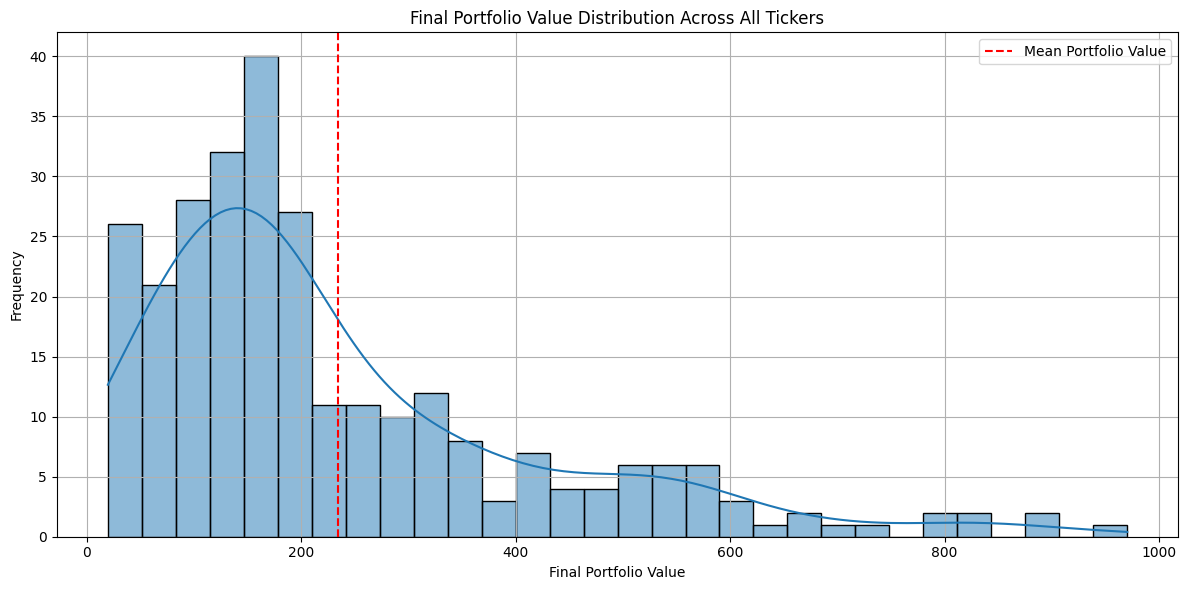

Summary and plots rebuilt successfully.


In [21]:
# === Imports ===
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# === Mount Drive ===
drive.mount('/content/drive', force_remount=True)

# === Paths ===
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"  # adjust if needed
DATA_DIR = os.path.join(RESULTS_DIR, "data")
os.makedirs(os.path.join(RESULTS_DIR, "plots"), exist_ok=True)

summary_records = []

# === Scan and Aggregate Metrics ===
for filename in os.listdir(DATA_DIR):
    if filename.endswith("_result.csv"):
        filepath = os.path.join(DATA_DIR, filename)

        parts = filename.replace(".csv", "").split("_")
        ticker = parts[0]
        train_date = parts[1]
        test_date = parts[2]

        df = pd.read_csv(filepath)
        if df.empty:
            continue

        try:
            accuracy = round((df["Signal"] == df["Target"]).mean(), 4)
        except:
            accuracy = 0.0

        returns = df["Close"].pct_change().fillna(0)
        sharpe = round((returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252), 3)
        drawdown = round(((df["Close"].cummax() - df["Close"]) / df["Close"].cummax()).max() * 100, 2)
        final_value = df["Close"].iloc[-1]
        return_pct = round((df["Close"].iloc[-1] - df["Close"].iloc[0]) / df["Close"].iloc[0] * 100, 2)

        summary_records.append({
            "Ticker": ticker,
            "Train Period": train_date,
            "Test Period": test_date,
            "Model": "XGBoost",
            "Accuracy": accuracy,
            "Sharpe": sharpe,
            "Drawdown": drawdown,
            "Return": return_pct,
            "Final_Portfolio": round(final_value, 2)
        })

# === Save Summary ===
summary_df = pd.DataFrame(summary_records)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_walkforward_metrics_rebuilt.csv"), index=False)

# === Add Composite Score ===
summary_df['score'] = (
    summary_df['Sharpe'] * 0.4 +
    summary_df['Return'] * 0.3 +
    summary_df['Final_Portfolio'] * 0.3
)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_model_selector_metrics_rebuilt.csv"), index=False)

# === Best Model per Ticker ===
best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                        .groupby('Ticker').first().reset_index()
best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_best_models_by_score_rebuilt.xlsx"), index=False)

# === Visualization ===
# Top 5 / Bottom 5
top5 = summary_df.sort_values(by="Final_Portfolio", ascending=False).head(5)
bottom5 = summary_df.sort_values(by="Final_Portfolio").head(5)

print("\n=== Top 5 Models by Final Portfolio ===")
print(top5[['Ticker', 'Final_Portfolio', 'Sharpe', 'Return', 'Drawdown', 'Accuracy']])

print("\n=== Bottom 5 Models by Final Portfolio ===")
print(bottom5[['Ticker', 'Final_Portfolio', 'Sharpe', 'Return', 'Drawdown', 'Accuracy']])

# Mean score per ticker
mean_scores = summary_df.groupby("Ticker")[["Sharpe", "Return", "Accuracy", "Final_Portfolio"]].mean().sort_values("Final_Portfolio", ascending=False)
mean_scores.to_csv(os.path.join(RESULTS_DIR, "xgb_ticker_mean_metrics_rebuilt.csv"))

# Plot portfolio distribution
plt.figure(figsize=(12, 6))
sns.histplot(summary_df["Final_Portfolio"], kde=True, bins=30)
plt.axvline(summary_df["Final_Portfolio"].mean(), color='red', linestyle='--', label='Mean Portfolio Value')
plt.title("Final Portfolio Value Distribution Across All Tickers")
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "plots", "portfolio_distribution_rebuilt.png"))
plt.show()

print("Summary and plots rebuilt successfully.")


In [23]:
# === Imports ===
import os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# === Mount Google Drive ===
drive.mount('/content/drive', force_remount=True)

# === Paths ===
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
DATA_DIR = os.path.join(RESULTS_DIR, "data")
PLOT_DIR = os.path.join(RESULTS_DIR, "plots_simulated")
os.makedirs(PLOT_DIR, exist_ok=True)

# === Portfolio Simulation Function ===
def simulate_portfolio(df, initial_capital=100000, slippage_pct=0.001, atr_default=2.0):
    capital = initial_capital
    shares = 0
    portfolio = []

    last_trade_idx = -10
    df = df.copy()
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['ATR'] = df.get('ATR', atr_default)

    for i, row in df.iterrows():
        price = row['Close']
        signal = row['Signal']
        atr = row.get('ATR', atr_default)

        if signal == 1 and (i - last_trade_idx > 5) and capital > price and price > row['Rolling_Mean_50']:
            risk_per_trade = 0.02 * capital
            stop_price = price - atr
            risk_per_share = max(price - stop_price, 1e-6)
            qty = min((risk_per_trade // risk_per_share), (capital * 0.1) // price)
            buy_price = price * (1 + slippage_pct)

            if qty > 0:
                capital -= qty * buy_price
                shares += qty
                last_trade_idx = i

        elif signal == -1 and shares > 0 and (i - last_trade_idx > 5):
            sell_price = price * (1 - slippage_pct)
            capital += shares * sell_price
            shares = 0
            last_trade_idx = i

        portfolio.append(capital + shares * price)

    df['Portfolio_Value'] = portfolio
    return df

# === Main Simulation Loop ===
summary_records = []

for filename in os.listdir(DATA_DIR):
    if filename.endswith("_result.csv"):
        filepath = os.path.join(DATA_DIR, filename)
        df = pd.read_csv(filepath)

        if df.empty or 'Signal' not in df.columns:
            continue

        parts = filename.replace(".csv", "").split("_")
        ticker = parts[0]
        train_date = parts[1]
        test_date = parts[2]

        df = simulate_portfolio(df)

        returns = pd.Series(df['Portfolio_Value']).pct_change().fillna(0)
        sharpe = round((returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252), 3)
        drawdown = round(((df['Portfolio_Value'].cummax() - df['Portfolio_Value']) / df['Portfolio_Value'].cummax()).max() * 100, 2)
        final_value = df['Portfolio_Value'].iloc[-1]
        return_pct = round((final_value - 100000) / 100000 * 100, 2)

        try:
            accuracy = round((df["Signal"] == df["Target"]).mean(), 4)
        except:
            accuracy = 0.0

        summary_records.append({
            "Ticker": ticker,
            "Train Period": train_date,
            "Test Period": test_date,
            "Model": "XGBoost",
            "Accuracy": accuracy,
            "Sharpe": sharpe,
            "Drawdown": drawdown,
            "Return": return_pct,
            "Final_Portfolio": round(final_value, 2)
        })

        # Save plot
        plt.figure(figsize=(12, 6))
        plt.plot(df['Portfolio_Value'], label='Simulated Portfolio')
        plt.title(f"{ticker} ({train_date} → {test_date}) Portfolio Simulation")
        plt.xlabel("Time")
        plt.ylabel("Portfolio Value")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(PLOT_DIR, f"{ticker}_{train_date}_{test_date}_simulated.png"))
        plt.close()

# === Save Summary ===
summary_df = pd.DataFrame(summary_records)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_simulated_metrics.csv"), index=False)

summary_df['score'] = (
    summary_df['Sharpe'] * 0.4 +
    summary_df['Return'] * 0.3 +
    summary_df['Final_Portfolio'] * 0.3
)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_simulated_model_selector.csv"), index=False)

best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                        .groupby('Ticker').first().reset_index()
best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_simulated_best_models_by_score.xlsx"), index=False)

print("Simulated portfolios complete. Results saved.")


Mounted at /content/drive
Simulated portfolios complete. Results saved.


Portfolio Summary (Starting Capital = $100,000):
- Count: 277
- Mean Final Portfolio: $100,022.22
- Median Final Portfolio: $99,984.49
- Max Final Portfolio: $114,439.04
- Min Final Portfolio: $86,808.72
- Std Dev: $1,810.20


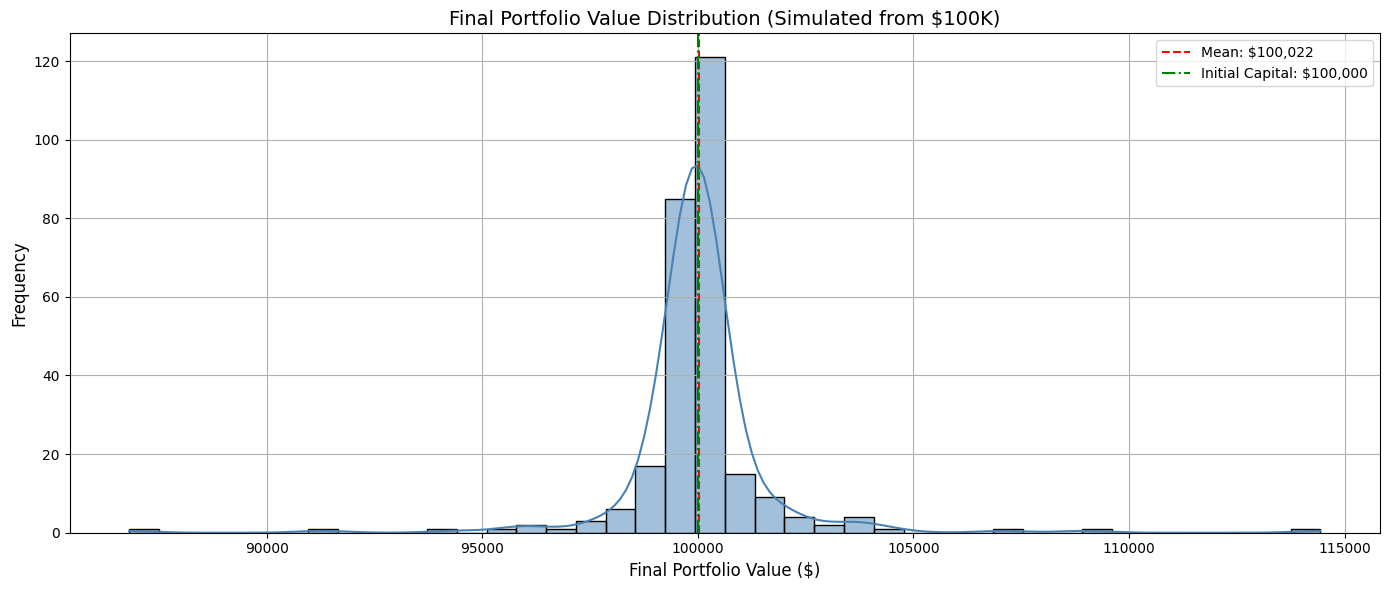


Top 5 Best Windows by Final Portfolio Value:
    Ticker Test Period  Final_Portfolio  Sharpe  Return  Drawdown
11    TSLA  2024-03-30        114439.04   1.835   14.44      3.34
207    AMD  2022-12-06        108974.17   0.906    8.97      7.87
33      GE  2024-03-30        107053.83   2.126    7.05      2.03
220   NVDA  2023-04-05        104552.12   1.003    4.55      0.87
72     NKE  2024-03-30        104013.26   0.422    4.01      4.90

Bottom 5 Worst Windows by Final Portfolio Value:
    Ticker Test Period  Final_Portfolio  Sharpe  Return  Drawdown
190   NVDA  2023-06-04         86808.72  -0.778  -13.19     19.22
134   ORCL  2022-08-08         91287.96  -1.081   -8.71      9.67
38     TMO  2024-04-03         94365.05  -0.805   -5.63      7.58
40    AVGO  2023-10-02         95679.52  -1.454   -4.32      4.45
175   TSLA  2023-02-04         95870.11  -1.113   -4.13      5.34


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the simulated portfolio results
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
df = pd.read_csv(os.path.join(RESULTS_DIR, "xgb_simulated_metrics.csv"))

# Summary Stats
mean_final = df["Final_Portfolio"].mean()
median_final = df["Final_Portfolio"].median()
max_final = df["Final_Portfolio"].max()
min_final = df["Final_Portfolio"].min()
std_final = df["Final_Portfolio"].std()
count = len(df)

print(f"Portfolio Summary (Starting Capital = $100,000):")
print(f"- Count: {count}")
print(f"- Mean Final Portfolio: ${mean_final:,.2f}")
print(f"- Median Final Portfolio: ${median_final:,.2f}")
print(f"- Max Final Portfolio: ${max_final:,.2f}")
print(f"- Min Final Portfolio: ${min_final:,.2f}")
print(f"- Std Dev: ${std_final:,.2f}")
plt.figure(figsize=(14, 6))
sns.histplot(df["Final_Portfolio"], kde=True, bins=40, color='steelblue')
plt.axvline(mean_final, color='red', linestyle='--', label=f'Mean: ${mean_final:,.0f}')
plt.axvline(100000, color='green', linestyle='-.', label='Initial Capital: $100,000')
plt.title("Final Portfolio Value Distribution (Simulated from $100K)", fontsize=14)
plt.xlabel("Final Portfolio Value ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "simulated_final_portfolio_distribution.png"))
plt.show()
top5 = df.sort_values(by="Final_Portfolio", ascending=False).head(5)
bottom5 = df.sort_values(by="Final_Portfolio", ascending=True).head(5)

print("\nTop 5 Best Windows by Final Portfolio Value:")
print(top5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])

print("\nBottom 5 Worst Windows by Final Portfolio Value:")
print(bottom5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])


Mounted at /content/drive

Portfolio Summary (Starting Capital = $100,000):
- Count: 277
- Mean Final Portfolio: $99,921.69
- Median Final Portfolio: $99,932.97
- Max Final Portfolio: $139,101.71
- Min Final Portfolio: $76,246.54
- Std Dev: $5,982.35

Top 5 Best Windows by Final Portfolio Value:
    Ticker Test Period  Final_Portfolio  Sharpe  Return  Drawdown
207    AMD  2022-12-06        139101.71   1.669   39.10      9.03
265   AVGO  2023-12-01        134576.29   1.368   34.58      9.09
210   NVDA  2023-08-03        123110.85   1.319   23.11     13.20
3     TSLA  2022-08-08        122885.42   2.316   22.89      5.29
51    NVDA  2024-03-30        118103.56   1.741   18.10      4.78

Bottom 5 Worst Windows by Final Portfolio Value:
    Ticker Test Period  Final_Portfolio  Sharpe  Return  Drawdown
32    INTC  2023-12-01         76246.54  -1.584  -23.75     13.08
65    NVDA  2022-08-08         78850.52  -2.880  -21.15     18.98
38     TMO  2024-04-03         84395.29  -0.795  -15.60    

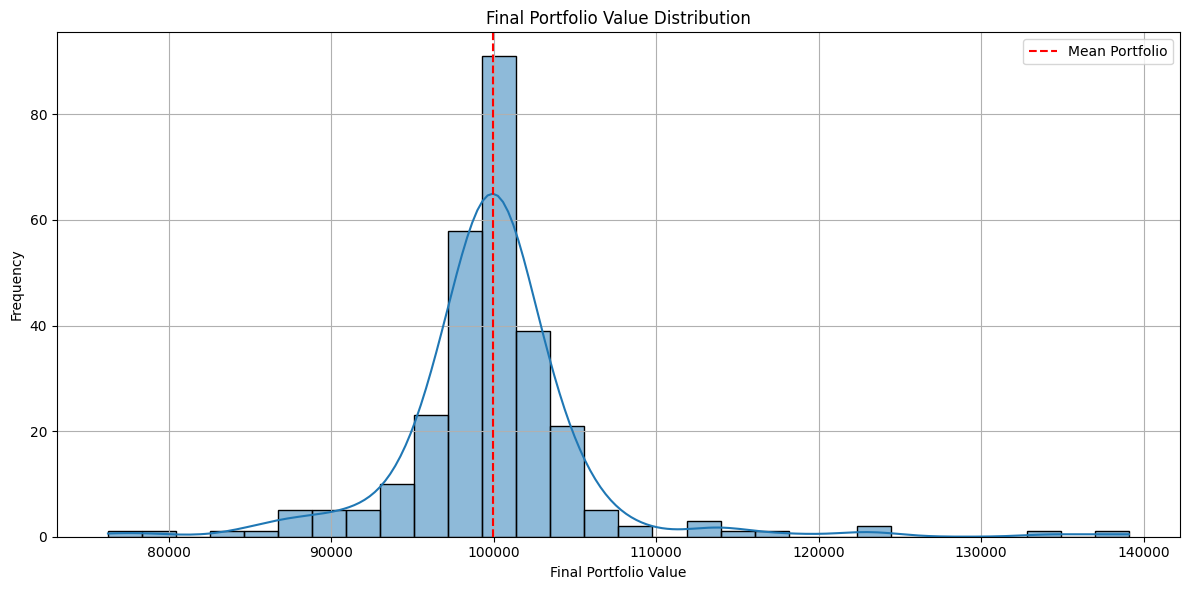

In [27]:
# === Imports ===
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# === Mount Google Drive ===
drive.mount('/content/drive', force_remount=True)

# === Config Paths ===
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
DATA_DIR = os.path.join(RESULTS_DIR, "data")
os.makedirs(DATA_DIR, exist_ok=True)

# === Simulate Trading from Signals ===
def simulate_trading(df, initial_cash=100000, slippage_pct=0.001):
    cash = initial_cash
    position = 0
    portfolio_values = []

    for i in range(len(df)):
        price = df["Close"].iloc[i]
        signal = df["Signal"].iloc[i]

        # BUY
        if signal == 1 and position == 0:
            buy_price = price * (1 + slippage_pct)
            position = cash / buy_price
            cash = 0

        # SELL
        elif signal == -1 and position > 0:
            sell_price = price * (1 - slippage_pct)
            cash = position * sell_price
            position = 0

        # Portfolio Value
        value = cash + position * price
        portfolio_values.append(value)

    # Fix mismatch by padding if needed
    while len(portfolio_values) < len(df):
        portfolio_values.append(portfolio_values[-1])
    return pd.Series(portfolio_values, index=df.index[:len(portfolio_values)])

# === Aggregate Results ===
summary_records = []
for filename in os.listdir(DATA_DIR):
    if filename.endswith("_result.csv"):
        filepath = os.path.join(DATA_DIR, filename)
        df = pd.read_csv(filepath)
        if df.empty or 'Signal' not in df or 'Close' not in df:
            continue

        parts = filename.replace(".csv", "").split("_")
        ticker = parts[0]
        train_date = parts[1]
        test_date = parts[2]

        # Convert datetime if present
        if 'Datetime' in df.columns:
            df['Datetime'] = pd.to_datetime(df['Datetime'])

        # Simulate portfolio
        df["Portfolio"] = simulate_trading(df)
        df.dropna(inplace=True)

        # Metrics
        try:
            accuracy = round((df["Signal"] == df["Target"]).mean(), 4) if "Target" in df else np.nan
        except:
            accuracy = 0.0

        returns = df["Portfolio"].pct_change().fillna(0)
        sharpe = round((returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252), 3)
        drawdown = round(((df["Portfolio"].cummax() - df["Portfolio"]) / df["Portfolio"].cummax()).max() * 100, 2)
        final_value = df["Portfolio"].iloc[-1]
        return_pct = round((final_value - 100000) / 100000 * 100, 2)

        summary_records.append({
            "Ticker": ticker,
            "Test Period": test_date,
            "Train Period": train_date,
            "Model": "XGBoost",
            "Accuracy": accuracy,
            "Sharpe": sharpe,
            "Drawdown": drawdown,
            "Return": return_pct,
            "Final_Portfolio": round(final_value, 2)
        })

# === Create Summary DataFrame ===
summary_df = pd.DataFrame(summary_records)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_portfolio_simulation_summary.csv"), index=False)

# === Add Score Column ===
summary_df['score'] = (
    summary_df['Sharpe'] * 0.4 +
    summary_df['Return'] * 0.3 +
    summary_df['Final_Portfolio'] * 0.3
)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_model_selector_metrics_final.csv"), index=False)

# === Save Best Models by Ticker ===
best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                        .groupby('Ticker').first().reset_index()
best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_best_models_by_score_final.xlsx"), index=False)

# === Portfolio Summary Stats ===
print("\nPortfolio Summary (Starting Capital = $100,000):")
print(f"- Count: {len(summary_df)}")
print(f"- Mean Final Portfolio: ${summary_df['Final_Portfolio'].mean():,.2f}")
print(f"- Median Final Portfolio: ${summary_df['Final_Portfolio'].median():,.2f}")
print(f"- Max Final Portfolio: ${summary_df['Final_Portfolio'].max():,.2f}")
print(f"- Min Final Portfolio: ${summary_df['Final_Portfolio'].min():,.2f}")
print(f"- Std Dev: ${summary_df['Final_Portfolio'].std():,.2f}")

# === Top/Bottom 5 ===
top5 = summary_df.sort_values(by="Final_Portfolio", ascending=False).head(5)
bottom5 = summary_df.sort_values(by="Final_Portfolio").head(5)

print("\nTop 5 Best Windows by Final Portfolio Value:")
print(top5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])

print("\nBottom 5 Worst Windows by Final Portfolio Value:")
print(bottom5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])

# === Distribution Plot ===
plt.figure(figsize=(12, 6))
sns.histplot(summary_df["Final_Portfolio"], bins=30, kde=True)
plt.axvline(summary_df["Final_Portfolio"].mean(), color='red', linestyle='--', label='Mean Portfolio')
plt.title("Final Portfolio Value Distribution")
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "xgb_final_portfolio_distribution.png"))
plt.show()
